In [1]:
# Barretina, J et al. (2012) The Cancer Cell Line Encyclopedia enables predictive modelling of anticancer drug sensitivity. Nature. 483:603-7.
# CCLE Cell Line Gene Expression Profiles
# https://maayanlab.cloud/Harmonizome/dataset/CCLE+Cell+Line+Gene+Expression+Profiles

In [2]:
import warnings; warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = 200
import numpy as np
import time, os

In [3]:
expression_link = "https://data.broadinstitute.org/ccle/CCLE_RNAseq_rsem_genes_tpm_20180929.txt.gz"
annotation_link = "https://data.broadinstitute.org/ccle/Cell_lines_annotations_20181226.txt"
#"https://data.broadinstitute.org/ccle/CCLE_RNAseq_genes_counts_20180929.gct.gz"

In [4]:
# print("File Size:", f"{(os.stat(expression_link).st_size/(1024*1024)):,.0f}", " MB")

In [5]:
GenesOfInterest = ['ENSG00000188389', 'ENSG00000120217', 'ENSG00000163599']

In [6]:
%%time
annotation_df = pd.read_csv(annotation_link, index_col=False, header=0, sep='\t', quotechar='"', skiprows=0, error_bad_lines=False)

CPU times: total: 62.5 ms
Wall time: 892 ms


In [7]:
annotations_df = annotation_df[['CCLE_ID', 'Name', 'Site_Primary']].copy()

In [8]:
annotations_df.sample(3)

,CCLE_ID,Name,Site_Primary
226,KMS26_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,KMS-26,haematopoietic_and_lymphoid_tissue
108,SU8686_PANCREAS,SU.86.86,pancreas
741,NCIH1781_LUNG,NCI-H1781,lung


In [9]:
%%time
expression_df = pd.read_csv(expression_link, index_col=False, header=0, sep='\t', quotechar='"', skiprows=0, error_bad_lines=False)

CPU times: total: 15.4 s
Wall time: 40.6 s


In [10]:
columns = expression_df.columns.tolist(); res=columns[:5]; print(res)

['gene_id', 'transcript_ids', '22RV1_PROSTATE', '2313287_STOMACH', '253JBV_URINARY_TRACT']


In [11]:
expression_df.rename(columns={'gene_id':'EnsemblID'}, inplace=True)
expression_df['EnsemblID'] = expression_df['EnsemblID'].str.slice(0,15)
expression_df.drop(['transcript_ids'], axis = 1, inplace = True)
expression_df.sample(3)

,EnsemblID,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,8305C_THYROID,8505C_THYROID,8MGBA_CENTRAL_NERVOUS_SYSTEM,A101D_SKIN,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A253_SALIVARY_GLAND,A2780_OVARY,A375_SKIN,A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A427_LUNG,A498_KIDNEY,A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A549_LUNG,A673_BONE,A704_KIDNEY,ABC1_LUNG,ACCMESO1_PLEURA,ACHN_KIDNEY,AGS_STOMACH,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AM38_CENTRAL_NERVOUS_SYSTEM,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AN3CA_ENDOMETRIUM,ASPC1_PANCREAS,AU565_BREAST,BC3C_URINARY_TRACT,BCP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BCPAP_THYROID,BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BEN_LUNG,BFTC905_URINARY_TRACT,BFTC909_KIDNEY,BHT101_THYROID,BHY_UPPER_AERODIGESTIVE_TRACT,BICR16_UPPER_AERODIGESTIVE_TRACT,BICR18_UPPER_AERODIGESTIVE_TRACT,BICR22_UPPER_AERODIGESTIVE_TRACT,BICR31_UPPER_AERODIGESTIVE_TRACT,BICR56_UPPER_AERODIGESTIVE_TRACT,BICR6_UPPER_AERODIGESTIVE_TRACT,BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BL70_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BT12_SOFT_TISSUE,BT20_BREAST,BT474_BREAST,BT483_BREAST,BT549_BREAST,BV173_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BXPC3_PANCREAS,C2BBE1_LARGE_INTESTINE,C32_SKIN,C8166_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CA46_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CACO2_LARGE_INTESTINE,CADOES1_BONE,CAKI1_KIDNEY,CAKI2_KIDNEY,CAL120_BREAST,CAL12T_LUNG,CAL148_BREAST,CAL27_UPPER_AERODIGESTIVE_TRACT,CAL29_URINARY_TRACT,CAL33_UPPER_AERODIGESTIVE_TRACT,CAL51_BREAST,CAL54_KIDNEY,CAL62_THYROID,CAL78_BONE,CAL851_BREAST,CALU1_LUNG,CALU3_LUNG,CALU6_LUNG,CAMA1_BREAST,CAOV3_OVARY,CAOV4_OVARY,CAPAN1_PANCREAS,CAPAN2_PANCREAS,CAS1_CENTRAL_NERVOUS_SYSTEM,CCFSTTG1_CENTRAL_NERVOUS_SYSTEM,CCK81_LARGE_INTESTINE,CFPAC1_PANCREAS,CH157MN_CENTRAL_NERVOUS_SYSTEM,CHAGOK1_LUNG,CHP126_AUTONOMIC_GANGLIA,...,SW1353_BONE,SW1417_LARGE_INTESTINE,SW1463_LARGE_INTESTINE,SW1573_LUNG,SW1710_URINARY_TRACT,SW1783_CENTRAL_NERVOUS_SYSTEM,SW1990_PANCREAS,SW403_LARGE_INTESTINE,SW480_LARGE_INTESTINE,SW48_LARGE_INTESTINE,SW579_THYROID,SW620_LARGE_INTESTINE,SW780_URINARY_TRACT,SW837_LARGE_INTESTINE,SW900_LUNG,SW948_LARGE_INTESTINE,T173_FIBROBLAST,T24_URINARY_TRACT,T3M10_LUNG,T3M4_PANCREAS,T47D_BREAST,T84_LARGE_INTESTINE,T98G_CENTRAL_NERVOUS_SYSTEM,TALL1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TC71_BONE,TCCPAN2_PANCREAS,TCCSUP_URINARY_TRACT,TE10_OESOPHAGUS,TE11_OESOPHAGUS,TE125T_FIBROBLAST,TE14_OESOPHAGUS,TE159T_FIBROBLAST,TE15_OESOPHAGUS,TE1_OESOPHAGUS,TE441T_SOFT_TISSUE,TE4_OESOPHAGUS,TE5_OESOPHAGUS,TE617T_SOFT_TISSUE,TE6_OESOPHAGUS,TE8_OESOPHAGUS,TE9_OESOPHAGUS,TEN_ENDOMETRIUM,TF1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TGBC11TKB_STOMACH,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TIG3TD_FIBROBLAST,TM31_CENTRAL_NERVOUS_SYSTEM,TM87_SOFT_TISSUE,TO175T_FIBROBLAST,TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TOV112D_OVARY,TOV21G_OVARY,TT2609C02_THYROID,TTC1240_SOFT_TISSUE,TTC549_SOFT_TISSUE,TTC642_SOFT_TISSUE,TTC709_SOFT_TISSUE,TT_OESOPHAGUS,TT_THYROID,TUHR10TKB_KIDNEY,TUHR14TKB_KIDNEY,TUHR4TKB_KIDNEY,TYKNU_OVARY,U118MG_CENTRAL_NERVOUS_SYSTEM,U178_CENTRAL_NERVOUS_SYSTEM,U251MG_CENTRAL_NERVOUS_SYSTEM,U266B1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,U2OS_BONE,U343_CENTRAL_NERVOUS_SYSTEM,U87MG_CENTRAL_NERVOUS_SYSTEM,U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UACC257_SKIN,UACC62_SKIN,UACC812_BREAST,UACC893_BREAST,UBLC1_URINARY_TRACT,UMUC1_URINARY_TRACT,UMUC3_URINARY_TRACT,UO31_KIDNEY,UOK101_KIDNEY,VCAP_PROSTATE,VMCUB1_URINARY_TRACT,VMRCRCW_KIDNEY,VMRCRCZ_KIDNEY,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_

In [12]:
expression_df = expression_df[expression_df['EnsemblID'].isin(GenesOfInterest)]

In [13]:
expression_df.sample(3)

,EnsemblID,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,8305C_THYROID,8505C_THYROID,8MGBA_CENTRAL_NERVOUS_SYSTEM,A101D_SKIN,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A253_SALIVARY_GLAND,A2780_OVARY,A375_SKIN,A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A427_LUNG,A498_KIDNEY,A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,A549_LUNG,A673_BONE,A704_KIDNEY,ABC1_LUNG,ACCMESO1_PLEURA,ACHN_KIDNEY,AGS_STOMACH,ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AM38_CENTRAL_NERVOUS_SYSTEM,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AN3CA_ENDOMETRIUM,ASPC1_PANCREAS,AU565_BREAST,BC3C_URINARY_TRACT,BCP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BCPAP_THYROID,BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BEN_LUNG,BFTC905_URINARY_TRACT,BFTC909_KIDNEY,BHT101_THYROID,BHY_UPPER_AERODIGESTIVE_TRACT,BICR16_UPPER_AERODIGESTIVE_TRACT,BICR18_UPPER_AERODIGESTIVE_TRACT,BICR22_UPPER_AERODIGESTIVE_TRACT,BICR31_UPPER_AERODIGESTIVE_TRACT,BICR56_UPPER_AERODIGESTIVE_TRACT,BICR6_UPPER_AERODIGESTIVE_TRACT,BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BL70_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BT12_SOFT_TISSUE,BT20_BREAST,BT474_BREAST,BT483_BREAST,BT549_BREAST,BV173_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,BXPC3_PANCREAS,C2BBE1_LARGE_INTESTINE,C32_SKIN,C8166_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CA46_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CACO2_LARGE_INTESTINE,CADOES1_BONE,CAKI1_KIDNEY,CAKI2_KIDNEY,CAL120_BREAST,CAL12T_LUNG,CAL148_BREAST,CAL27_UPPER_AERODIGESTIVE_TRACT,CAL29_URINARY_TRACT,CAL33_UPPER_AERODIGESTIVE_TRACT,CAL51_BREAST,CAL54_KIDNEY,CAL62_THYROID,CAL78_BONE,CAL851_BREAST,CALU1_LUNG,CALU3_LUNG,CALU6_LUNG,CAMA1_BREAST,CAOV3_OVARY,CAOV4_OVARY,CAPAN1_PANCREAS,CAPAN2_PANCREAS,CAS1_CENTRAL_NERVOUS_SYSTEM,CCFSTTG1_CENTRAL_NERVOUS_SYSTEM,CCK81_LARGE_INTESTINE,CFPAC1_PANCREAS,CH157MN_CENTRAL_NERVOUS_SYSTEM,CHAGOK1_LUNG,CHP126_AUTONOMIC_GANGLIA,...,SW1353_BONE,SW1417_LARGE_INTESTINE,SW1463_LARGE_INTESTINE,SW1573_LUNG,SW1710_URINARY_TRACT,SW1783_CENTRAL_NERVOUS_SYSTEM,SW1990_PANCREAS,SW403_LARGE_INTESTINE,SW480_LARGE_INTESTINE,SW48_LARGE_INTESTINE,SW579_THYROID,SW620_LARGE_INTESTINE,SW780_URINARY_TRACT,SW837_LARGE_INTESTINE,SW900_LUNG,SW948_LARGE_INTESTINE,T173_FIBROBLAST,T24_URINARY_TRACT,T3M10_LUNG,T3M4_PANCREAS,T47D_BREAST,T84_LARGE_INTESTINE,T98G_CENTRAL_NERVOUS_SYSTEM,TALL1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TC71_BONE,TCCPAN2_PANCREAS,TCCSUP_URINARY_TRACT,TE10_OESOPHAGUS,TE11_OESOPHAGUS,TE125T_FIBROBLAST,TE14_OESOPHAGUS,TE159T_FIBROBLAST,TE15_OESOPHAGUS,TE1_OESOPHAGUS,TE441T_SOFT_TISSUE,TE4_OESOPHAGUS,TE5_OESOPHAGUS,TE617T_SOFT_TISSUE,TE6_OESOPHAGUS,TE8_OESOPHAGUS,TE9_OESOPHAGUS,TEN_ENDOMETRIUM,TF1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TGBC11TKB_STOMACH,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TIG3TD_FIBROBLAST,TM31_CENTRAL_NERVOUS_SYSTEM,TM87_SOFT_TISSUE,TO175T_FIBROBLAST,TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,TOV112D_OVARY,TOV21G_OVARY,TT2609C02_THYROID,TTC1240_SOFT_TISSUE,TTC549_SOFT_TISSUE,TTC642_SOFT_TISSUE,TTC709_SOFT_TISSUE,TT_OESOPHAGUS,TT_THYROID,TUHR10TKB_KIDNEY,TUHR14TKB_KIDNEY,TUHR4TKB_KIDNEY,TYKNU_OVARY,U118MG_CENTRAL_NERVOUS_SYSTEM,U178_CENTRAL_NERVOUS_SYSTEM,U251MG_CENTRAL_NERVOUS_SYSTEM,U266B1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,U2OS_BONE,U343_CENTRAL_NERVOUS_SYSTEM,U87MG_CENTRAL_NERVOUS_SYSTEM,U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,UACC257_SKIN,UACC62_SKIN,UACC812_BREAST,UACC893_BREAST,UBLC1_URINARY_TRACT,UMUC1_URINARY_TRACT,UMUC3_URINARY_TRACT,UO31_KIDNEY,UOK101_KIDNEY,VCAP_PROSTATE,VMCUB1_URINARY_TRACT,VMRCRCW_KIDNEY,VMRCRCZ_KIDNEY,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WM983B_SKIN,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YAPC_PANCREAS,YD10B_UPPER_AERODIGESTIVE_TRACT,YD15_SALIVARY_GLAND,YD38_UPPER_AERODIGESTIVE_TRACT,YD8_UPPER_AERODIGESTIVE_TRACT,YH13_CENTRAL_NERVOUS_SYSTEM,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR751_

In [14]:
melt_df = pd.melt(expression_df, id_vars='EnsemblID', var_name= 'CCLE_ID' , value_name='TPM')

In [15]:
melt_df.sample(3)

,EnsemblID,CCLE_ID,TPM
209,ENSG00000188389,CACO2_LARGE_INTESTINE,0.01
87,ENSG00000120217,A704_KIDNEY,1.98
2008,ENSG00000163599,NCIN87_STOMACH,0.03


In [16]:
alldata_df = pd.merge(melt_df, annotations_df, on='CCLE_ID', how='left')
alldata_df = alldata_df.drop('CCLE_ID', axis=1)

In [17]:
alldata_df.sample(3)

,EnsemblID,TPM,Name,Site_Primary
687,ENSG00000120217,20.82,HCC364,lung
3042,ENSG00000120217,3.19,YD-8,upper_aerodigestive_tract
2266,ENSG00000163599,0.00,RERF-GC-1B,stomach


In [18]:
palette = sns.color_palette("pastel")

In [24]:
%%time
alldata_df_log2 = alldata_df.apply(lambda x: np.log2(x+1) if np.issubdtype(x.dtype, np.number) else x)

CPU times: total: 0 ns
Wall time: 3.99 ms


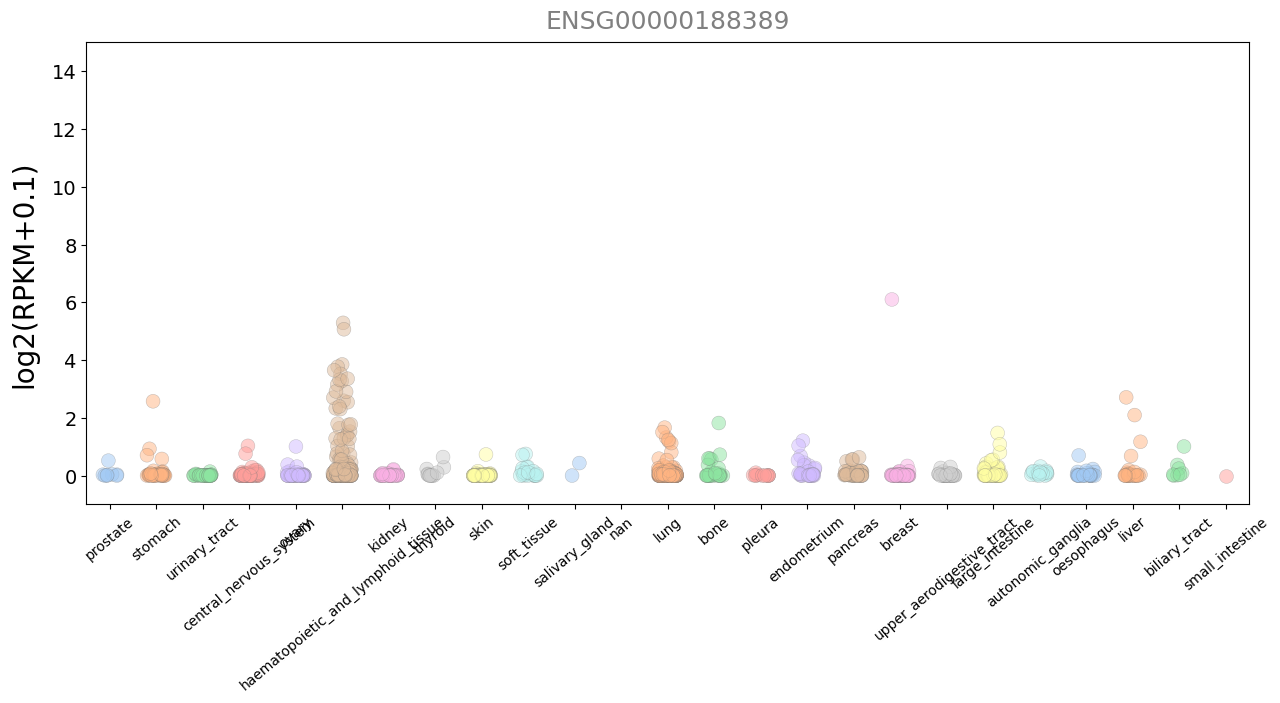

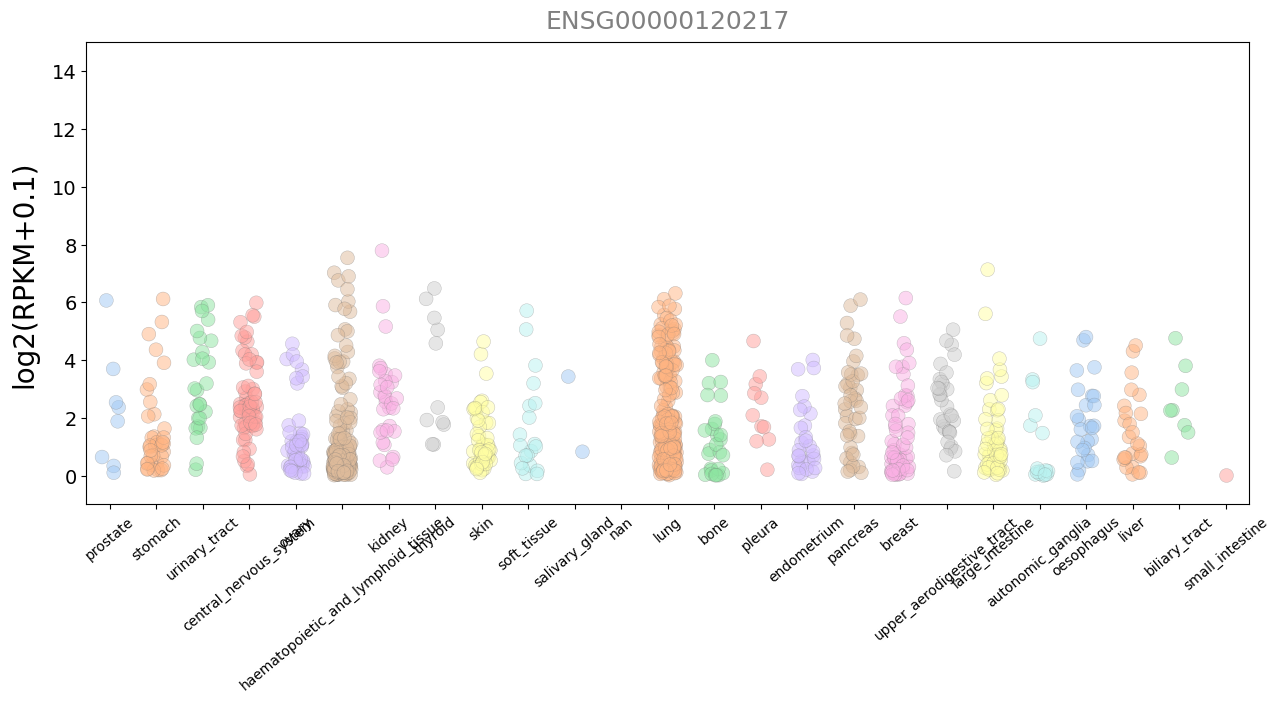

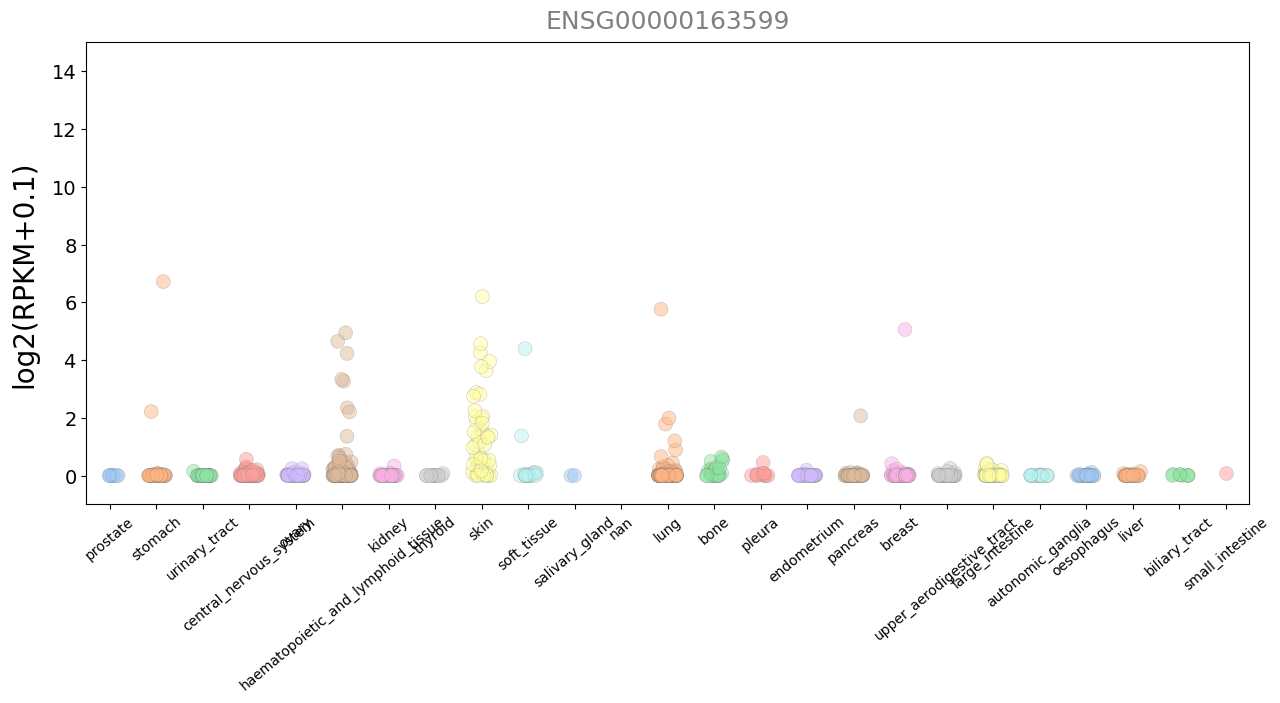

CPU times: total: 1.55 s
Wall time: 1.54 s


In [32]:
%%time
for gene in GenesOfInterest:
    data = alldata_df_log2[alldata_df_log2['EnsemblID'] == gene]
    fig, ax = plt.subplots(figsize=(15, 6))
    plt.subplots_adjust(wspace=0.02, hspace=0.01)
    sns.plotting_context("notebook", font_scale = 2)

    ax = sns.stripplot(data=data, x="Site_Primary", y="TPM", jitter=0.2, 
                   dodge=False, palette = palette, linewidth=0.3, size=10, edgecolor='gray', alpha=0.5)
    plt.gca().set_yscale('linear'); plt.ylim(-1, 15) 
    ax.set_title(gene, fontsize=18, pad=10, color='gray')
    plt.xlabel("", labelpad=10); plt.ylabel("log2(RPKM+0.1)", fontsize=20, labelpad=10, color='gray') 
    plt.xticks(fontsize = 10, rotation = 40); plt.yticks(fontsize=14, rotation=0)
    plt.show()